In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Cargar el conjunto de datos "wine.csv"
wine_data = pd.read_csv('wine.csv')
wine_data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2]:
# Calculo de matríz de correlación para obtener las características
correlation_matrix = wine_data.corr()
correlation_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [3]:
# Separar las características del conjunto de datos
X = wine_data.iloc[:, [3,4,5,6,8,9,10]].values
X

array([[ 15.6 , 127.  ,   2.8 , ...,   2.29,   5.64,   1.04],
       [ 11.2 , 100.  ,   2.65, ...,   1.28,   4.38,   1.05],
       [ 18.6 , 101.  ,   2.8 , ...,   2.81,   5.68,   1.03],
       ...,
       [ 20.  , 120.  ,   1.59, ...,   1.35,  10.2 ,   0.59],
       [ 20.  , 120.  ,   1.65, ...,   1.46,   9.3 ,   0.6 ],
       [ 24.5 ,  96.  ,   2.05, ...,   1.35,   9.2 ,   0.61]])

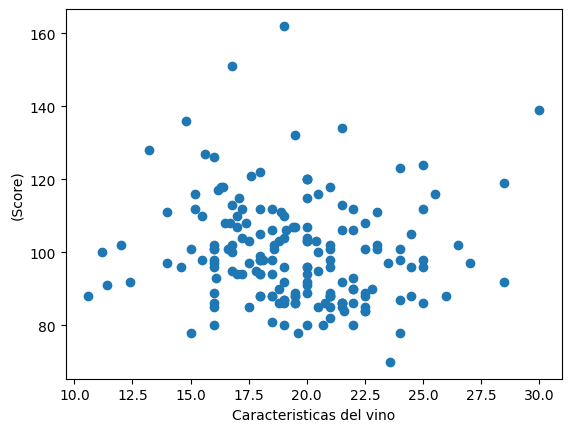

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Caracteristicas del vino')
plt.ylabel('(Score)')
plt.show()


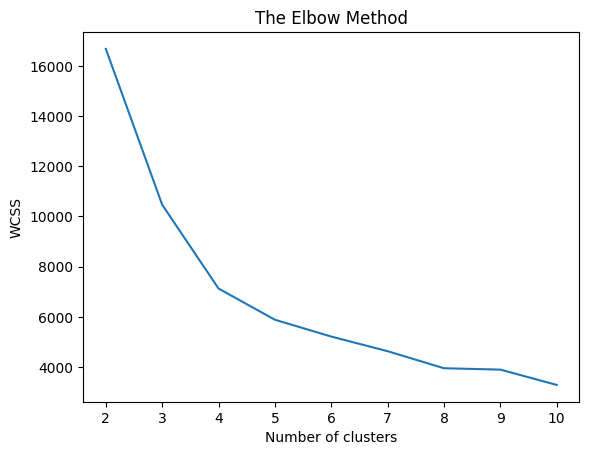

In [5]:
# Calcular el WCSS para cada valor de k de 1 a 10
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS o SSE
plt.show()


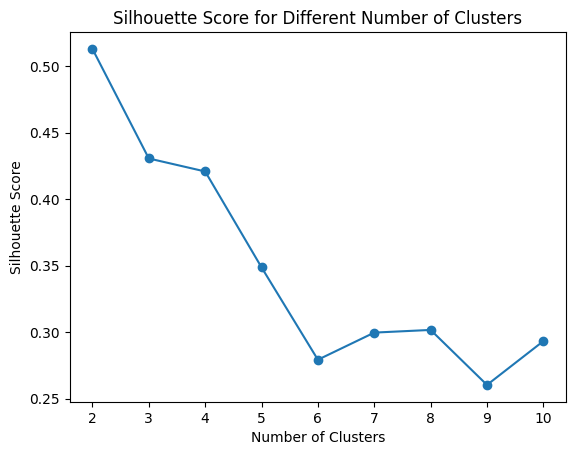

In [6]:
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

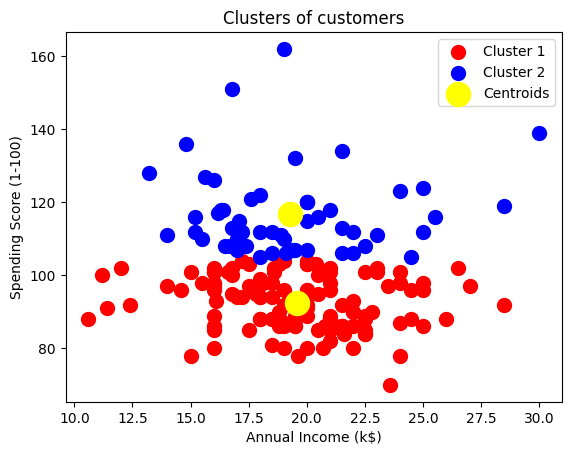

In [7]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [9]:
# Ejercicio 2
clusters_data = pd.read_csv('clusters.csv')
clusters_data



,x,y
0,0.816729,1.327191
1,0.286716,1.304853
2,2.087953,0.025302
3,0.418027,1.034951
4,1.230035,-0.127041
...,...,...
3245,4.343430,6.717349
3246,-4.310424,5.162806
3247,4.669646,7.294812
3248,-3.898566,1.252578


In [10]:
X1 = clusters_data.iloc[:, [0, 1]].values
X1

array([[ 0.81672911,  1.32719052],
       [ 0.28671649,  1.30485269],
       [ 2.08795325,  0.02530197],
       ...,
       [ 4.66964574,  7.29481155],
       [-3.89856601,  1.25257774],
       [-2.38077677,  6.56210651]])

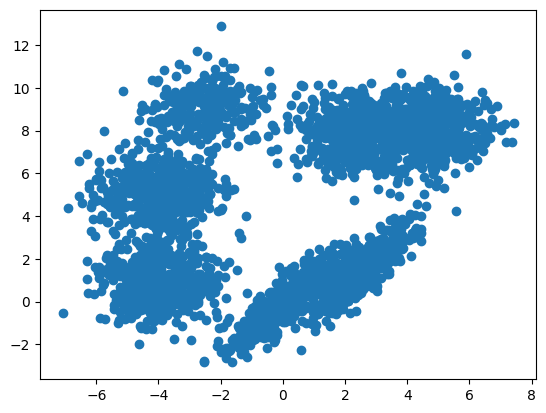

In [11]:
plt.scatter(X1[:, 0], X1[:, 1])
#plt.xlabel('Caracteristicas del vino')
#plt.ylabel('(Score)')
plt.show()

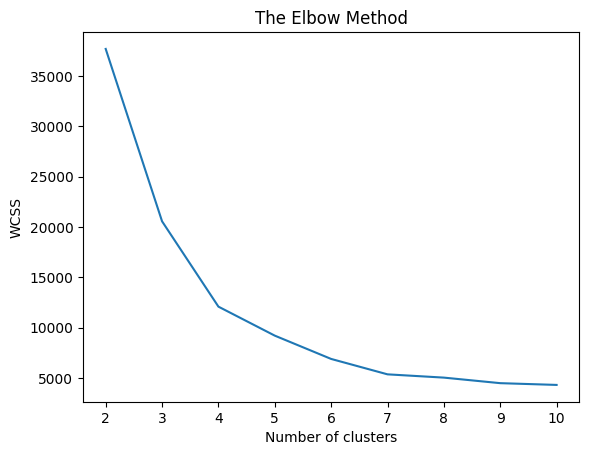

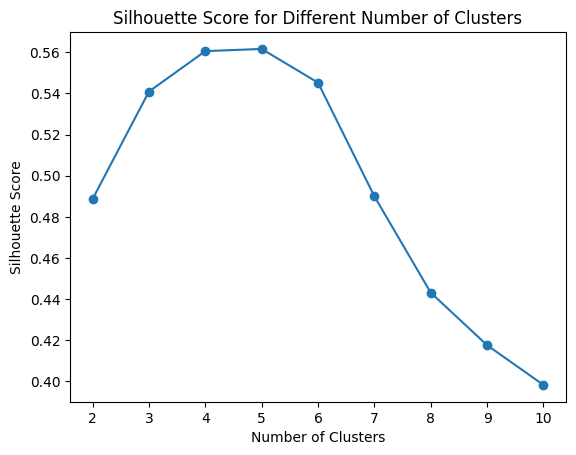

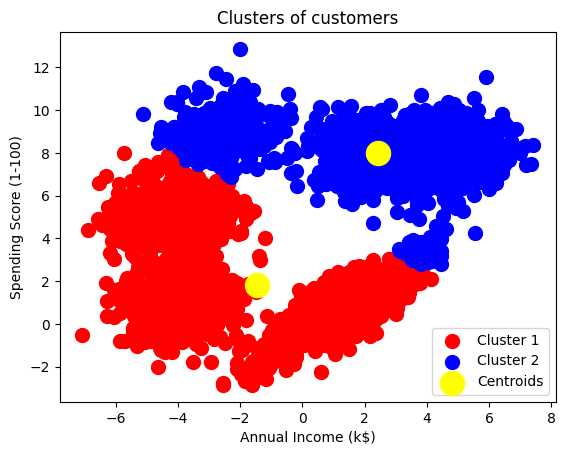

In [12]:
#K-means
# Calcular el WCSS para cada valor de k de 1 a 10
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X1, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS o SSE
plt.show()


plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X1)
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Agglomerative Elapsed Time: 0.3055391311645508


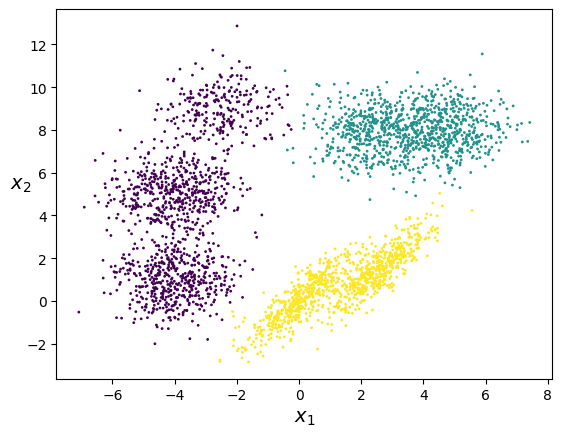

In [13]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import time


def plot_clusters(X1, y=None):
    plt.scatter(X1[:, 0], X1[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.show()


# Agglomerative clustering
start_time = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X1)
elapsed_time = time.time() - start_time
print("Agglomerative Elapsed Time:", elapsed_time)
plot_clusters(X1, y_agg)


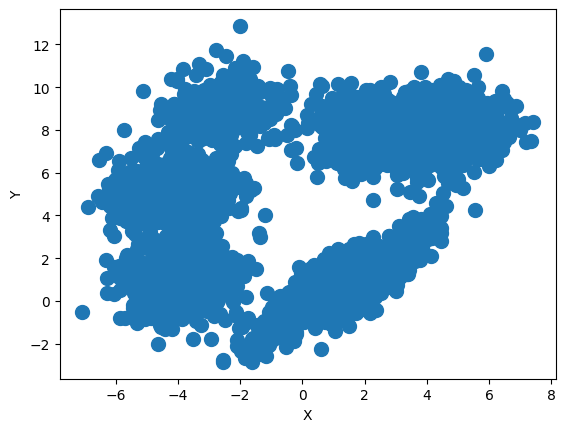

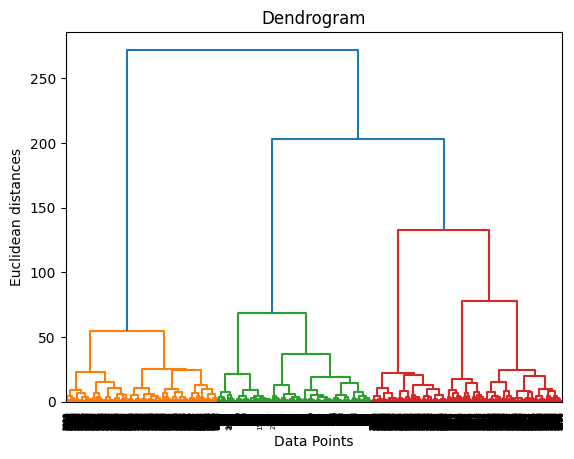

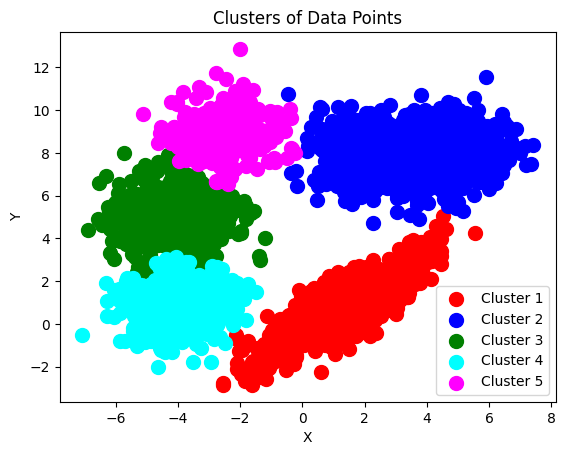

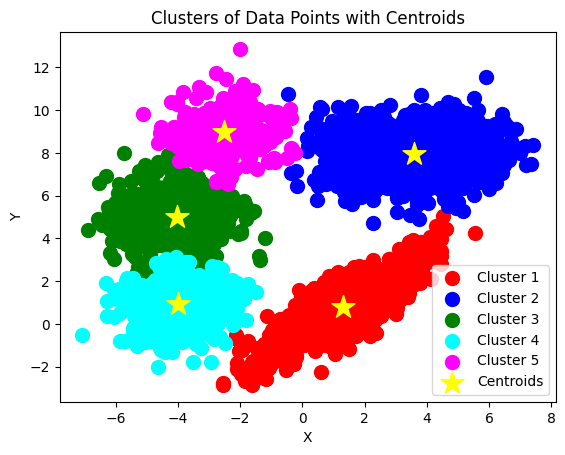

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Mostrar los puntos de datos
plt.scatter(X1[:, 0], X1[:, 1], s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Mostrar el dendrograma
dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

# Realizar clustering jerárquico
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X1)

# Visualizar los clusters
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X1[y_hc == 3, 0], X1[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X1[y_hc == 4, 0], X1[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Calcular y mostrar los centroides de los clusters
centroids = []
for i in range(5):
    centroids.append(np.mean(X1[y_hc == i], axis=0))

plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X1[y_hc == 2, 0], X1[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X1[y_hc == 3, 0], X1[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X1[y_hc == 4, 0], X1[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=300, c='yellow', label='Centroids', marker='*')
plt.title('Clusters of Data Points with Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


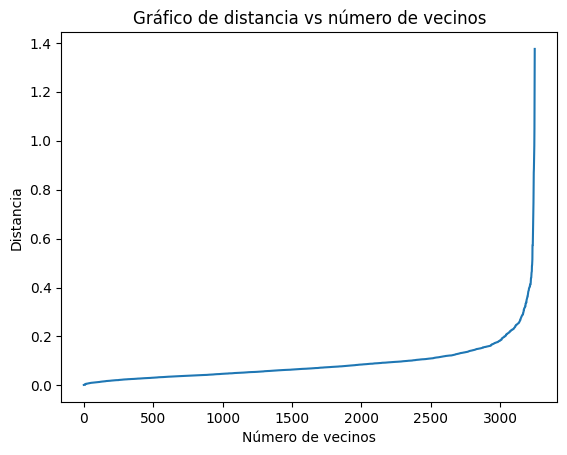

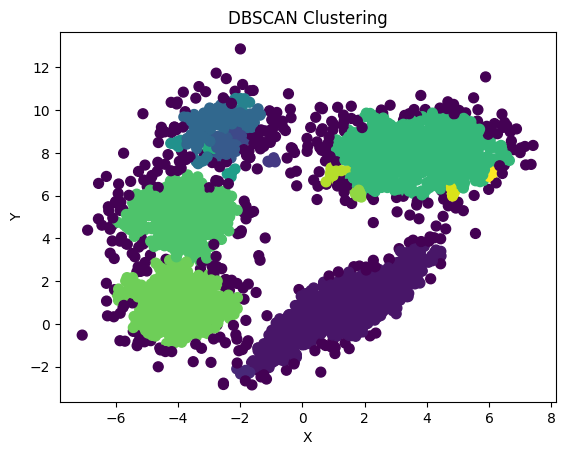

In [15]:
# DBSCAN

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

X2 = clusters_data.iloc[:, [0, 1]].values

# Analizar las distancias a los vecinos más cercanos
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X2)
distances, indices = nbrs.kneighbors(X2)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.plot(distances)
plt.xlabel('Número de vecinos')
plt.ylabel('Distancia')
plt.title('Gráfico de distancia vs número de vecinos')
plt.show()

# Selección de epsilon basado en el gráfico anterior
epsilon = 0.25

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan.fit(X2)
labels = dbscan.labels_

# Visualizar los resultados de DBSCAN
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.show()
